In [ ]:
!pip install pandas_datareader
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install yfinance
!pip install plotly
!pip install matplotlib
!pip install math



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
plt.rcParams['figure.figsize'] = (15,12)


Obtendo dados

In [ ]:
acoes = ['ITUB4.SA', 'BBDC4.SA', 'SANB11.SA', 'BBAS3.SA' ]
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2013-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Tratando os Dados

In [ ]:
acoes_df = acoes_df.rename(columns={'ITUB4.SA': 'Itaú', 'BBDC4.SA': 'Bradesco', 'SANB11.SA': 'Santander', 'BBAS3.SA': 'BancoDoBrasil'})
acoes_df['Date'] = acoes_df.index
df = acoes_df[['Date', 'Itaú', 'Bradesco', 'Santander', 'BancoDoBrasil']]
acoes_df_normalizado = df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]


Gerando visualizações

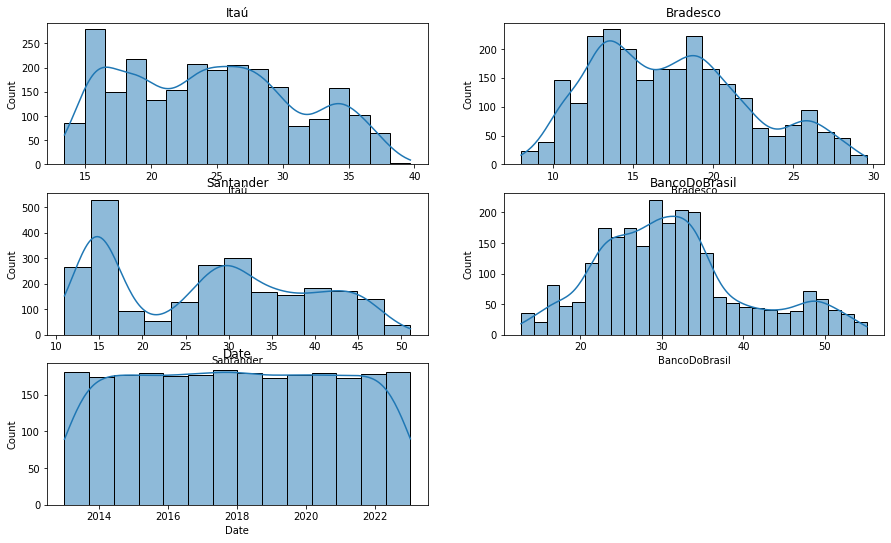

In [ ]:
for i in range(len(acoes_df.columns)):
  plt.subplot(4, 2, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

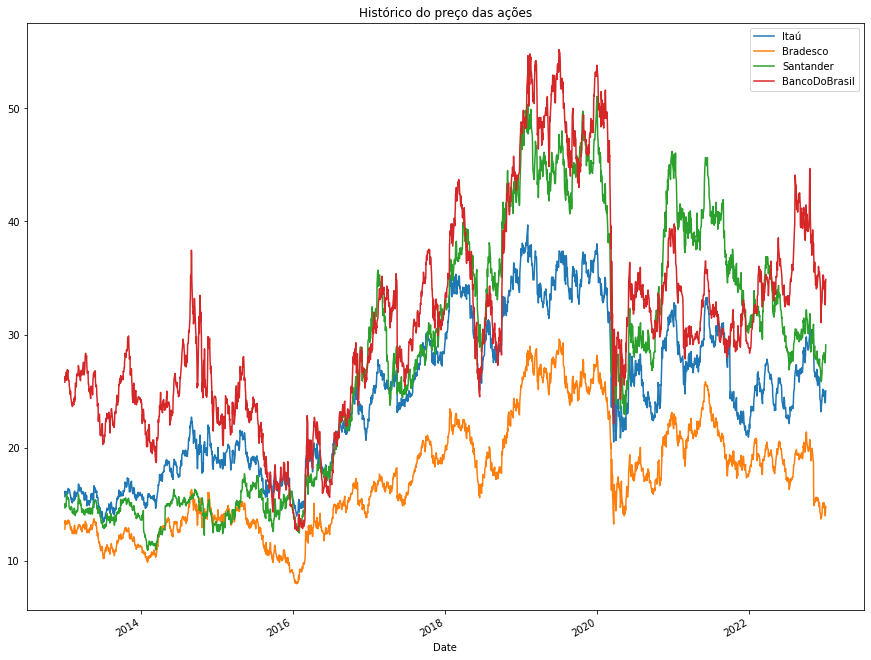

In [ ]:
acoes_df.plot(x = 'Date', title = 'Histórico do preço das ações')

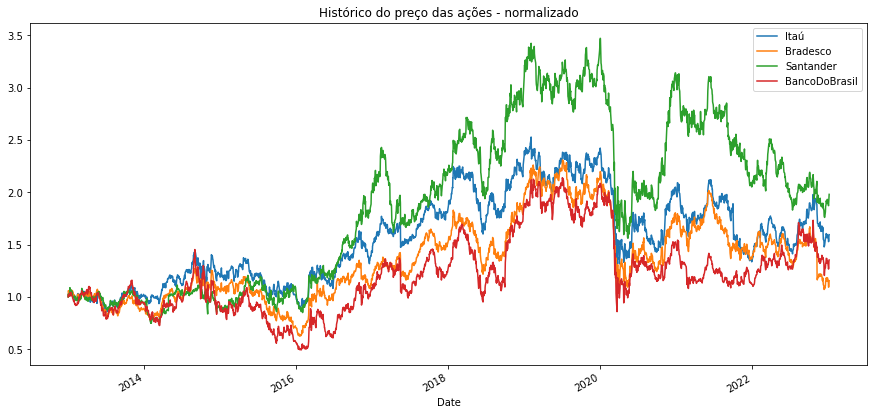

In [ ]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado')

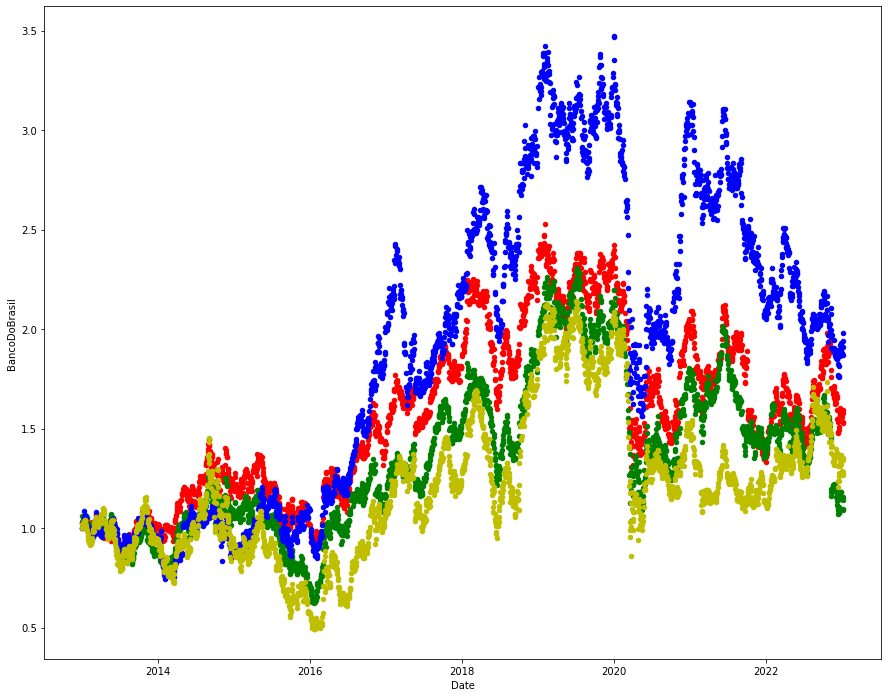

In [ ]:
ax1 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'Itaú',color='r')
ax2 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'Bradesco',color='g',ax=ax1)
ax3 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'Santander',color='b',ax=ax1)
ax4 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'BancoDoBrasil',color='y',ax=ax1)

Taxa de retorno simples

In [ ]:
len(acoes_df_normalizado)

2489

In [ ]:
((acoes_df_normalizado['Itaú'][len(acoes_df_normalizado) - 1] - acoes_df_normalizado['Itaú'][0]) / acoes_df_normalizado['Itaú'][0]) * 100

59.42470488867211

In [ ]:
((acoes_df_normalizado['Bradesco'][len(acoes_df_normalizado) - 1] - acoes_df_normalizado['Bradesco'][0]) / acoes_df_normalizado['Bradesco'][0]) * 100



15.396112324184408

In [ ]:
((acoes_df_normalizado['Santander'][len(acoes_df_normalizado) - 1] - acoes_df_normalizado['Santander'][0]) / acoes_df_normalizado['Santander'][0]) * 100


97.95918883705383

In [ ]:
((acoes_df_normalizado['BancoDoBrasil'][len(acoes_df_normalizado) - 1] - acoes_df_normalizado['BancoDoBrasil'][0]) / acoes_df_normalizado['BancoDoBrasil'][0]) * 100

35.193806587450084

In [ ]:
acoes_df_normalizado['Itaú']

Date
2013-01-02    1.000000
2013-01-03    1.029872
2013-01-04    1.023782
2013-01-07    1.006380
2013-01-08    1.010441
                ...   
2023-01-02    1.559853
2023-01-03    1.527369
2023-01-04    1.531827
2023-01-05    1.579597
2023-01-06    1.594247
Name: Itaú, Length: 2489, dtype: float64

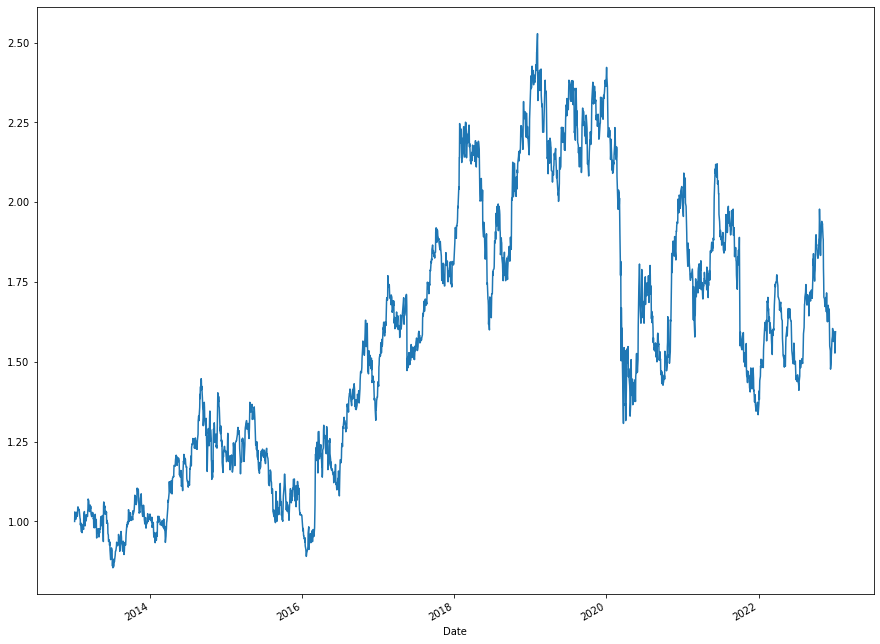

In [ ]:
acoes_df_normalizado['Itaú'].plot();

In [ ]:
acoes_df_normalizado['RS Itaú'] = (acoes_df_normalizado['Itaú'] / acoes_df_normalizado['Itaú'].shift(1)) - 1

In [ ]:
acoes_df_normalizado

,Date,Itaú,Bradesco,Santander,BancoDoBrasil,RS Itaú
Date,,,,,,
2013-01-02,2013-01-02,1.000000,1.000000,1.000000,1.000000,NaN
2013-01-03,2013-01-03,1.029872,1.059183,1.025850,1.019767,0.029872
2013-01-04,2013-01-04,1.023782,1.041400,1.015646,1.007364,-0.005914
2013-01-07,2013-01-07,1.006380,1.036121,1.006122,1.013566,-0.016997
2013-01-08,2013-01-08,1.010441,1.039733,1.025170,1.025194,0.004035
...,...,...,...,...,...,...
2023-01-02,2023-01-02,1.559853,1.150063,1.879592,1.289147,-0.020400
2023-01-03,2023-01-03,1.527369,1.091585,1.871429,1.265116,-0.020825
2023-01-04,2023-01-04,1.531827,1.094704,1.909524,1.281395,0.002919


In [ ]:
acoes_df_normalizado['RS Bradesco'] = (acoes_df_normalizado['Bradesco'] / acoes_df_normalizado['Bradesco'].shift(1)) - 1

In [ ]:
acoes_df_normalizado['RS Santander'] = (acoes_df_normalizado['Santander'] / acoes_df_normalizado['Santander'].shift(1)) - 1

In [ ]:
acoes_df_normalizado['RS BancoDoBrasil'] = (acoes_df_normalizado['BancoDoBrasil'] / acoes_df_normalizado['BancoDoBrasil'].shift(1)) - 1

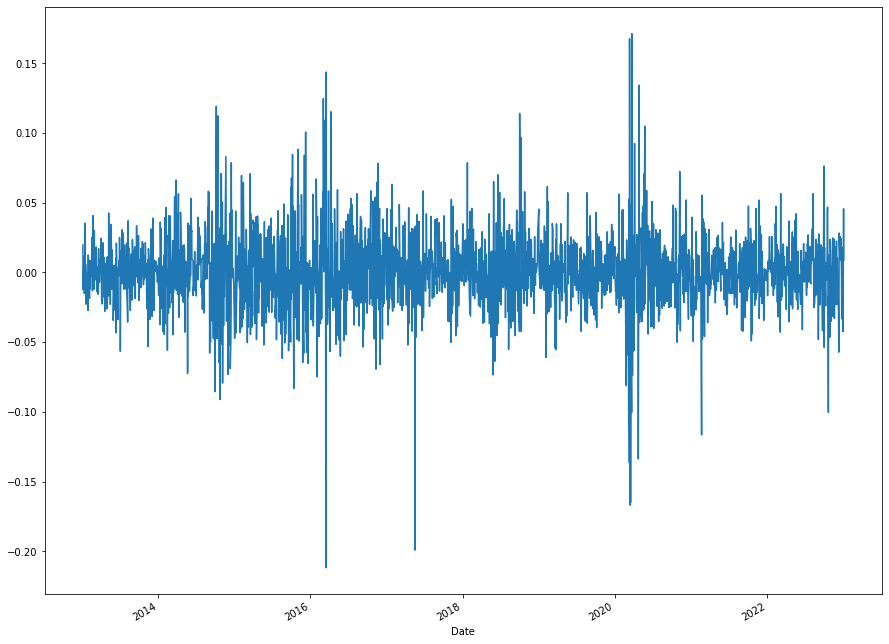

In [ ]:
acoes_df_normalizado['RS BancoDoBrasil'].plot();

taxas de retornos anuais


In [ ]:
(acoes_df_normalizado['RS Itaú'].mean() * 246) * 100

9.836006243818165

In [ ]:
(acoes_df_normalizado['RS Bradesco'].mean() * 246) * 100

7.726481674702904

In [ ]:
(acoes_df_normalizado['RS Santander'].mean() * 246) * 100

13.060358621599935

In [ ]:
(acoes_df_normalizado['RS BancoDoBrasil'].mean() * 246) * 100

12.160088656284783

Retorno de carteira de ações dos bancos


In [ ]:
acoes_df_normalizado.drop(["Itaú", "Bradesco", "Santander", "BancoDoBrasil", "Date" ], axis=1, inplace=True)

In [ ]:
acoes_df_normalizado

,RS Itaú,RS Bradesco,RS Santander,RS BancoDoBrasil
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.029872,0.059183,0.025850,0.019767
2013-01-04,-0.005914,-0.016789,-0.009947,-0.012163
2013-01-07,-0.016997,-0.005069,-0.009377,0.006156
2013-01-08,0.004035,0.003486,0.018932,0.011472
...,...,...,...,...
2023-01-02,-0.020400,-0.026403,-0.020213,-0.042327
2023-01-03,-0.020825,-0.050847,-0.004343,-0.018641
2023-01-04,0.002919,0.002857,0.020356,0.012868


In [ ]:
retorno_anual = (acoes_df_normalizado.mean() * 246) * 100
retorno_anual

RS Itaú              9.836006
RS Bradesco          7.726482
RS Santander        13.060359
RS BancoDoBrasil    12.160089
dtype: float64

In [ ]:
pesos_carteira1 = np.array([0.25, 0.25, 0.25, 0.25])

In [ ]:
np.dot(retorno_anual, pesos_carteira1)

10.695733799101447

Gráfico da carteira x BOVA

In [ ]:
acoes2 = 'BOVA11.SA'

acoes_df_normalizado['bovespa'] = yf.download(acoes2, start='2013-01-01')['Close']

acoes_df_normalizado


[*********************100%***********************]  1 of 1 completed


,RS Itaú,RS Bradesco,RS Santander,RS BancoDoBrasil,bovespa
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,61.270000
2013-01-03,0.029872,0.059183,0.025850,0.019767,61.919998
2013-01-04,-0.005914,-0.016789,-0.009947,-0.012163,61.320000
2013-01-07,-0.016997,-0.005069,-0.009377,0.006156,60.750000
2013-01-08,0.004035,0.003486,0.018932,0.011472,59.910000
...,...,...,...,...,...
2023-01-02,-0.020400,-0.026403,-0.020213,-0.042327,102.629997
2023-01-03,-0.020825,-0.050847,-0.004343,-0.018641,100.480003
2023-01-04,0.002919,0.002857,0.020356,0.012868,101.919998


In [ ]:
acoes_df_normalizado['RS Bovespa'] = (acoes_df_normalizado['bovespa'] / acoes_df_normalizado['bovespa'].shift(1)) - 1


In [ ]:
acoes_df_normalizado = acoes_df_normalizado.drop(["bovespa"], axis=1)

acoes_df_normalizado


,RS Itaú,RS Bradesco,RS Santander,RS BancoDoBrasil,RS Bovespa
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.029872,0.059183,0.025850,0.019767,0.010609
2013-01-04,-0.005914,-0.016789,-0.009947,-0.012163,-0.009690
2013-01-07,-0.016997,-0.005069,-0.009377,0.006156,-0.009295
2013-01-08,0.004035,0.003486,0.018932,0.011472,-0.013827
...,...,...,...,...,...
2023-01-02,-0.020400,-0.026403,-0.020213,-0.042327,-0.031336
2023-01-03,-0.020825,-0.050847,-0.004343,-0.018641,-0.020949
2023-01-04,0.002919,0.002857,0.020356,0.012868,0.014331


In [ ]:
acoes_df_normalizado['CARTEIRA'] = (acoes_df_normalizado['RS Itaú'] + acoes_df_normalizado['RS Bradesco'] + acoes_df_normalizado['RS Santander'] + acoes_df_normalizado['RS BancoDoBrasil'])/ 4


In [ ]:
figura = px.line(title = 'Histórico de retorno diário das ações')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado.index, y = acoes_df_normalizado[i], name = i)
figura.show()

carteira x bovespa

In [ ]:
acoes_df_normalizado.drop(['RS Itaú', 'RS Bradesco', 'RS Santander', 'RS BancoDoBrasil'], axis = 1, inplace = True)
acoes_df_normalizado

,RS Bovespa,CARTEIRA
Date,,
2013-01-02,NaN,NaN
2013-01-03,0.010609,0.033668
2013-01-04,-0.009690,-0.011203
2013-01-07,-0.009295,-0.006322
2013-01-08,-0.013827,0.009481
...,...,...
2023-01-02,-0.031336,-0.027336
2023-01-03,-0.020949,-0.023664
2023-01-04,0.014331,0.009750


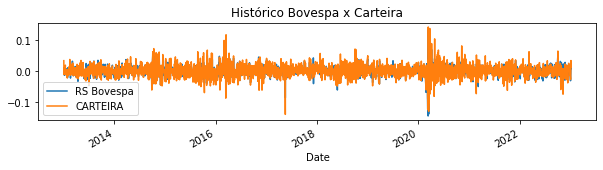

In [ ]:
acoes_df_normalizado['Date'] = acoes_df_normalizado.index
acoes_df_normalizado.plot(x = 'Date', figsize = (10,2), title = 'Histórico Bovespa x Carteira');

Calculo de risco

In [ ]:

acoes_dfnovo = acoes_df.copy()

acoes_dfnovo['bovespa'] = yf.download(acoes2, start='2013-01-01')['Close']
acoes_dfnovo.drop([ "Date" ], axis=1, inplace=True)
acoes_dfnovo['Date'] = acoes_dfnovo.index
acoes_dfnovo


[*********************100%***********************]  1 of 1 completed


,Itaú,Bradesco,Santander,BancoDoBrasil,bovespa,Date
Date,,,,,,
2013-01-02,15.700202,12.825389,14.700000,25.799999,61.270000,2013-01-02
2013-01-03,16.169205,13.584435,15.080000,26.309999,61.919998,2013-01-03
2013-01-04,16.073584,13.356365,14.930000,25.990000,61.320000,2013-01-04
2013-01-07,15.800377,13.288657,14.790000,26.150000,60.750000,2013-01-07
2013-01-08,15.864125,13.334983,15.070000,26.450001,59.910000,2013-01-08
...,...,...,...,...,...,...
2023-01-02,24.490000,14.750000,27.629999,33.259998,102.629997,2023-01-02
2023-01-03,23.980000,14.000000,27.510000,32.639999,100.480003,2023-01-03
2023-01-04,24.049999,14.040000,28.070000,33.060001,101.919998,2023-01-04


In [ ]:
def valores(inicio, final, banco):
  z = acoes_dfnovo[banco][acoes_dfnovo['Date'] == inicio ], acoes_dfnovo[banco][acoes_dfnovo['Date'] == final ]
  print(z)



Itaú

para todas as ações

In [ ]:
acoes_dfnovo.drop([ "Date" ], axis=1, inplace=True)
acoes_dfnovo

,Itaú,Bradesco,Santander,BancoDoBrasil,bovespa
Date,,,,,
2013-01-02,15.700202,12.825389,14.700000,25.799999,61.270000
2013-01-03,16.169205,13.584435,15.080000,26.309999,61.919998
2013-01-04,16.073584,13.356365,14.930000,25.990000,61.320000
2013-01-07,15.800377,13.288657,14.790000,26.150000,60.750000
2013-01-08,15.864125,13.334983,15.070000,26.450001,59.910000
...,...,...,...,...,...
2023-01-02,24.490000,14.750000,27.629999,33.259998,102.629997
2023-01-03,23.980000,14.000000,27.510000,32.639999,100.480003
2023-01-04,24.049999,14.040000,28.070000,33.060001,101.919998


In [ ]:
taxas_retorno = (acoes_dfnovo / acoes_dfnovo.shift(1)) - 1
taxas_retorno

,Itaú,Bradesco,Santander,BancoDoBrasil,bovespa
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.029872,0.059183,0.025850,0.019767,0.010609
2013-01-04,-0.005914,-0.016789,-0.009947,-0.012163,-0.009690
2013-01-07,-0.016997,-0.005069,-0.009377,0.006156,-0.009295
2013-01-08,0.004035,0.003486,0.018932,0.011472,-0.013827
...,...,...,...,...,...
2023-01-02,-0.020400,-0.026403,-0.020213,-0.042327,-0.031336
2023-01-03,-0.020825,-0.050847,-0.004343,-0.018641,-0.020949
2023-01-04,0.002919,0.002857,0.020356,0.012868,0.014331


In [ ]:
taxas_retorno.std() * 100


Itaú             2.058879
Bradesco         2.263319
Santander        2.267189
BancoDoBrasil    2.725717
bovespa          1.608004
dtype: float64

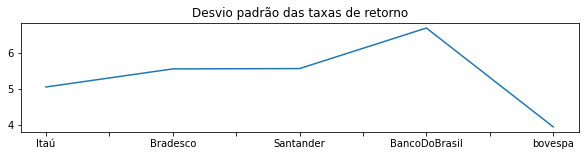

In [ ]:
h = taxas_retorno.std() * 246
h.plot(x = taxas_retorno.columns, figsize = (10,2), title = 'Desvio padrão das taxas de retorno')

In [ ]:
taxas_retorno.std() * math.sqrt(246)

Itaú             0.322923
Bradesco         0.354988
Santander        0.355595
BancoDoBrasil    0.427512
bovespa          0.252206
dtype: float64

Correlação entre ações

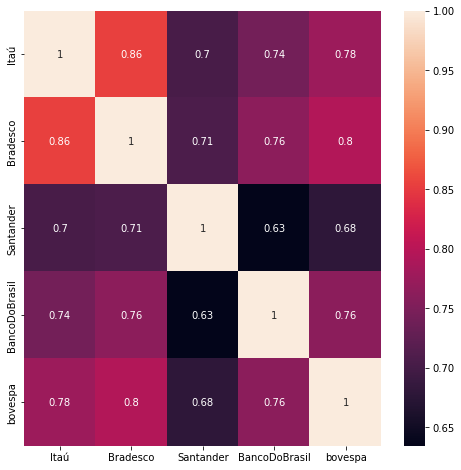

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

Risco da carteira

In [ ]:
pesoscarteira1 = np.array([0.25, 0.25, 0.25, 0.25, 0.0])
taxas_retorno

,Itaú,Bradesco,Santander,BancoDoBrasil,bovespa
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.029872,0.059183,0.025850,0.019767,0.010609
2013-01-04,-0.005914,-0.016789,-0.009947,-0.012163,-0.009690
2013-01-07,-0.016997,-0.005069,-0.009377,0.006156,-0.009295
2013-01-08,0.004035,0.003486,0.018932,0.011472,-0.013827
...,...,...,...,...,...
2023-01-02,-0.020400,-0.026403,-0.020213,-0.042327,-0.031336
2023-01-03,-0.020825,-0.050847,-0.004343,-0.018641,-0.020949
2023-01-04,0.002919,0.002857,0.020356,0.012868,0.014331


In [ ]:
l = taxas_retorno.cov() * 246

In [ ]:
np.dot(l, pesoscarteira1)

array([0.09638849, 0.10736763, 0.09829015, 0.12438563, 0.06937895])

In [ ]:
variancia_portfolio1 = np.dot(pesoscarteira1, np.dot(taxas_retorno.cov() * 246, pesoscarteira1))
variancia_portfolio1

0.10660797596402222

In [ ]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.3265087685867291

In [ ]:
plotdadosestatisticos = [[variancia_portfolio1, volatilidade_portfolio1]]




In [ ]:
gg = pd.DataFrame(plotdadosestatisticos, columns=['Variância' , 'Volatilidade'])

display(gg)

,Variância,Volatilidade
0,0.106608,0.326509


alocação de portfolio

In [ ]:
acoes_dfnovo

,Itaú,Bradesco,Santander,BancoDoBrasil,bovespa
Date,,,,,
2013-01-02,15.700202,12.825389,14.700000,25.799999,61.270000
2013-01-03,16.169205,13.584435,15.080000,26.309999,61.919998
2013-01-04,16.073584,13.356365,14.930000,25.990000,61.320000
2013-01-07,15.800377,13.288657,14.790000,26.150000,60.750000
2013-01-08,15.864125,13.334983,15.070000,26.450001,59.910000
...,...,...,...,...,...
2023-01-02,24.490000,14.750000,27.629999,33.259998,102.629997
2023-01-03,23.980000,14.000000,27.510000,32.639999,100.480003
2023-01-04,24.049999,14.040000,28.070000,33.060001,101.919998
